**Лабораторная работа №1. Вариант 2**

Подключение библиотек и задание параметров.

In [1]:
import math
import os
import array as arr
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
degr = 37

Чтение изображения из файла.

In [3]:
image = plt.imread("Bobyor.jpg").copy()


Вывод изображения.

In [4]:
def show_image(ax, image, title=None, cmap=None):

    ax.imshow(image, cmap=cmap)
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

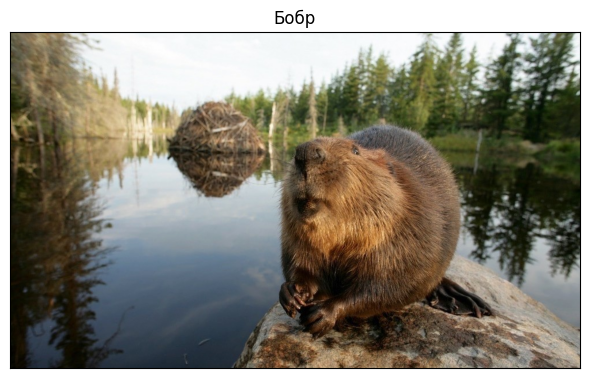

In [5]:
fig, ax = plt.subplots(figsize=(6, 6), layout="tight")
show_image(ax, image, title="Бобр", cmap="gray")

Выделение красного канала.

In [6]:
size = image.shape
image_red = [0]*size[0]
for i in range(size[0]):
    image_red[i] = [0]*size[1]  
for i in range(size[0]):
    for j in range(size[1]):
        image_red[i][j] = image[i][j][0]
#image_red = image.copy()
#for i in range(size[0]):
#    for j in range(size[1]):
#        image_red[i][j][1] = 0
#        image_red[i][j][2] = 0



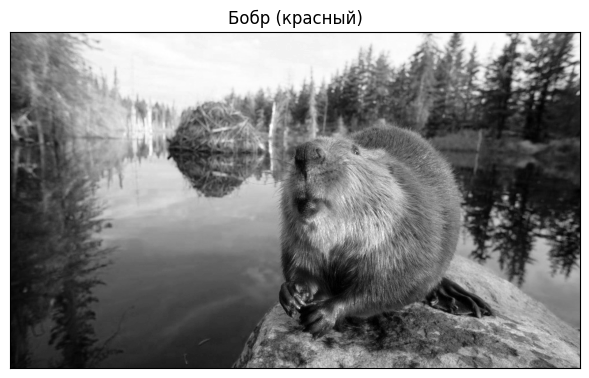

In [7]:
fig, ax = plt.subplots(figsize=(6, 6), layout="tight")
show_image(ax, image_red, title="Бобр (красный)", cmap="gray")

Поворот красного канала на 37 градусов по часовой стрелке.

In [8]:
def rotate_image(image, degree, is_clockwise):
    rads = math.radians(degree)

    rot_img = [0]*size[0]
    for i in range(size[0]):
        rot_img[i] = [0]*size[1]

    midx, midy = (size[0]//2, size[1]//2)

    for i in range(size[0]):
        for j in range(size[1]):
            if (is_clockwise):
                x = (i-midx)*math.cos(rads)-(j-midy)*math.sin(rads)
                y = (i-midx)*math.sin(rads)+(j-midy)*math.cos(rads)
            else:
                x = (i-midx)*math.cos(rads)+(j-midy)*math.sin(rads)
                y = -(i-midx)*math.sin(rads)+(j-midy)*math.cos(rads)

            x = round(x)+midx 
            y = round(y)+midy 

            if (x>=0 and y>=0 and x<size[0] and  y<size[1]):
                rot_img[i][j] = image[x][y]

    return rot_img 

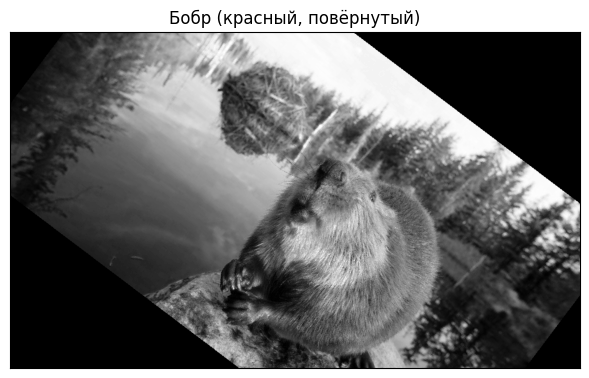

In [9]:
fig, ax = plt.subplots(figsize=(6, 6), layout="tight")
rotated_image_red = rotate_image(image_red, degr, True)
show_image(ax, rotated_image_red, title="Бобр (красный, повёрнутый)", cmap="gray")

Поворот изображения на 37 градусов против часовой стрелки.

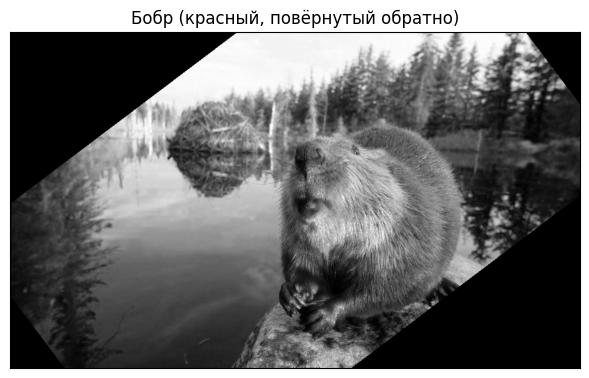

In [10]:
rotated_again_red = rotate_image(rotated_image_red, degr, False)
fig, ax = plt.subplots(figsize=(6, 6), layout="tight")
show_image(ax, rotated_again_red, title="Бобр (красный, повёрнутый обратно)", cmap="gray")

Модуль разности исходного и полутонового изображения.

C:\Users\kendy\AppData\Local\Temp\ipykernel_4140\524102068.py:6: RuntimeWarning: overflow encountered in scalar subtract
  image_red_diff[i][j] = abs(image_red[i][j]-rotated_again_red[i][j])


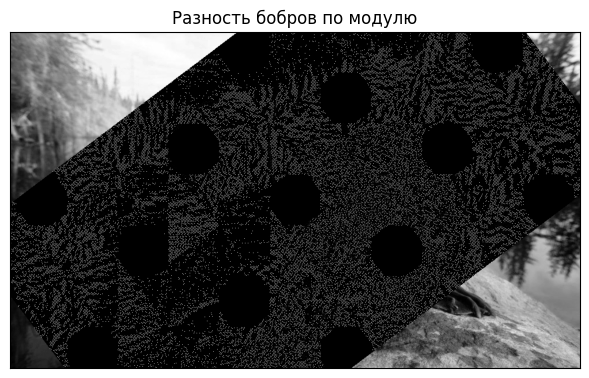

In [11]:
image_red_diff = [0]*size[0]
for i in range(size[0]):
    image_red_diff[i] = [0]*size[1]
for i in range(size[0]):
    for j in range(size[1]):
        image_red_diff[i][j] = abs(image_red[i][j]-rotated_again_red[i][j])
fig, ax = plt.subplots(figsize=(6, 6), layout="tight")
show_image(ax, image_red_diff, title="Разность бобров по модулю", cmap="gray")